In [1]:
import os #
import shutil # 
import cv2
import xml.etree.ElementTree as ET #
import matplotlib.pyplot as plt #
import matplotlib.patches as patches
import numpy as np
from sklearn.model_selection import train_test_split 

# Data

In [2]:
DATASET_DIR = 'datasets/'
ANNOTATIONS_DIR = 'datasets/annotations/'
IMAGES_DIR = 'datasets/images/'
LABELS_DIR = 'datasets/labels/'

CLASS_INDEXS = {'without_mask': 0, 'with_mask': 1, 'mask_weared_incorrect': 2}
CLASS_NAMES = {0: 'without_mask', 1: 'with_mask', 2: 'mask_weared_incorrect'}

In [3]:
def xml2YoloBox(bndbox, width, height):
    """Convert xml bounding box to YOLO bounding box.
    
        Args:
            bndbox (list | np.darray): A xml bounding box with format [xmin, ymin, xmax, ymax]
            width (int): A width of entire image
            height (int): A height of entire image
        Returns:
            yoloBox (list): The bounding box in YOLO format [xcenter, ycenter, boxWidth, boxHeight]
    """
    xcenter = ((bndbox[0] + bndbox[2]) / 2.) / width
    ycenter = ((bndbox[1] + bndbox[3]) / 2.) / height
    boxWidth = (bndbox[2] - bndbox[0]) / width
    boxHeight = (bndbox[3] - bndbox[1]) / height
    yoloBox = [xcenter, ycenter, boxWidth, boxHeight]
    return yoloBox

def yolo2XmlBox(bndbox, width, height):
    """Convert YOLO bounding box to xml bounding box.
    
        Args:
            bndbox (list | np.darray): A YOLO bounding box with format [xcenter, ycenter, boxWidth, boxHeight]
            width (int): A width of entire image
            height (int): A height of entire image
        Returns:
            xmlBox (list): The bounding box in xml format [xmin, ymin, xmax, ymax]
    """
    xmin = (bndbox[0] - bndbox[2] / 2.) * width
    ymin = (bndbox[1] - bndbox[3] / 2.) * height
    xmax = (bndbox[0] + bndbox[2] / 2.) * width
    ymax = (bndbox[1] + bndbox[3] / 2.) * height
    xmlBox = [int(xmin), int(ymin), int(xmax), int(ymax)]
    return xmlBox

In [4]:
def xml2YoloFormat(filepath):
    """Convert all objects in xml file to Ultralytics YOLO format.
    
        Args:
            filepath (Path): Path to xml file 
        Returns:
            allObjs (list): All objects in Ultralytics YOLO format
    """
    tree = ET.parse(filepath)
    root = tree.getroot()
    imageWidth = int(root.find('size').find('width').text)    
    imageHeight = int(root.find('size').find('height').text)
    
    allObjs = []
    for obj in root.findall('object'):
        className = obj.find('name').text
        classIdx = CLASS_INDEXS[className]
        xmlBox = [int(obj.find('bndbox')[i].text) for i in range(4)]
        yoloBox = xml2YoloBox(xmlBox, imageWidth, imageHeight)
        allObjs.append([classIdx] + yoloBox)
    return allObjs

# Preprocess the dataset 
Skip this one if you have already preprocessed the dataset (continue from  **Visuallization**).

In [5]:
if os.path.exists(LABELS_DIR):
    assert any([x not in os.listdir(LABELS_DIR) for x in ['train', 'val', 'test']]), "The dataset was preprocessed"

AssertionError: The dataset was preprocessed

In [6]:
# Write to txt file
os.makedirs('datasets/labels', exist_ok=True)
for filename in os.listdir(ANNOTATIONS_DIR):
    filepath = os.path.join(ANNOTATIONS_DIR, filename)
    data = xml2YoloFormat(filepath)
    f = open(f'datasets/labels/{filename[:-4]}.txt','w')            
    f.write('\n'.join(' '.join(map(str, obj)) for obj in data))
    f.close()   

In [7]:
def moveFile(filenames, imgPath, imgDest, labelPath, labelDest):
    os.makedirs(imgDest, exist_ok=True)    
    os.makedirs(labelDest, exist_ok=True)

    for filename in filenames:
        imgSrc = os.path.join(imgPath, filename + '.png')
        labelSrc = os.path.join(labelPath, filename + '.txt')
        shutil.move(imgSrc, imgDest)
        shutil.move(labelSrc, labelDest)

In [ ]:
allFilenames = [f[:-4] for f in os.listdir(IMAGES_DIR)]

#  Split train-val-test 
random_state = 1
train, valTest = train_test_split(allFilenames, test_size=0.3, random_state=random_state, shuffle=True) 
val, test = train_test_split(list(valTest), test_size=0.5, random_state=random_state, shuffle=True)

# Copy to corresponding folder
moveFile(train, IMAGES_DIR, f'{IMAGES_DIR}/train/', LABELS_DIR, f'{LABELS_DIR}/train/')
moveFile(val, IMAGES_DIR, f'{IMAGES_DIR}/val/', LABELS_DIR, f'{LABELS_DIR}/val/')
moveFile(test, IMAGES_DIR, f'{IMAGES_DIR}/test/', LABELS_DIR, f'{LABELS_DIR}/test/')

853
['maksssksksss0', 'maksssksksss1', 'maksssksksss10', 'maksssksksss100', 'maksssksksss101', 'maksssksksss102', 'maksssksksss103', 'maksssksksss104', 'maksssksksss105', 'maksssksksss106', 'maksssksksss107', 'maksssksksss108', 'maksssksksss109', 'maksssksksss11', 'maksssksksss110', 'maksssksksss111', 'maksssksksss112', 'maksssksksss113', 'maksssksksss114', 'maksssksksss115', 'maksssksksss116', 'maksssksksss117', 'maksssksksss118', 'maksssksksss119', 'maksssksksss12', 'maksssksksss120', 'maksssksksss121', 'maksssksksss122', 'maksssksksss123', 'maksssksksss124', 'maksssksksss125', 'maksssksksss126', 'maksssksksss127', 'maksssksksss128', 'maksssksksss129', 'maksssksksss13', 'maksssksksss130', 'maksssksksss131', 'maksssksksss132', 'maksssksksss133', 'maksssksksss134', 'maksssksksss135', 'maksssksksss136', 'maksssksksss137', 'maksssksksss138', 'maksssksksss139', 'maksssksksss14', 'maksssksksss140', 'maksssksksss141', 'maksssksksss142', 'maksssksksss143', 'maksssksksss144', 'maksssksksss145

# Visualization

In [21]:
def drawBoxes(image, bndboxes, withConfScore=False, isRgb=True):
    """Draw parsing bounding boxes on an parsing image.
        Args:
            image (Image): The original image.
            bndboxes (list): List of predicted bounding boxes, format: [x, y, w, h, cls, conf].
            name (str): Name to save the image.
            withConfScore (bool, optional): Show confidence score or not. Defaults is False.
            isRgb (bool, optional): The parsing image is rgb or bgr? (Just to keep the bounding box color consistent).
        Returns:
            (Image): The image with drawn bounding boxes.
    """
    # Specific color for each class
    if isRgb:
        classColor = {0: (255,0,0), 1: (0,255,0), 2: (0,0,255)}
    else: # bgr
        classColor = {2: (255,0,0), 1: (0,255,0), 0: (0,0,255)}
        
    
    # Load the image
    newImg = image.copy()
    h, w, _ = newImg.shape
  
    for obj in bndboxes:
        xmin, ymin, xmax, ymax = yolo2XmlBox(obj[:4], w, h)
        classIdx = obj[4]
        className = CLASS_NAMES[classIdx]
        color = classColor[classIdx]
        text = f"{className}({obj[5]})" if withConfScore else f"{className}"
        
        newImg = cv2.rectangle(newImg, (xmin, ymin), (xmax, ymax), color=color, thickness=2)
        newImg = cv2.putText(newImg, text, (xmin, ymin-5), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                   fontScale=0.5, color=color, thickness=1, lineType=cv2.LINE_AA)
    return newImg

In [22]:
def showImage(imagePath, predictedBoxes=None, labelPath=None):
    """Display an image with optinal predicted bounding boxes and true bounding boxes
    
        Args:
            imagePath (Path): Path to image
            predictedBoxes (list | np.darray, optinal): 
            labelPath (str, optinal): Path to true bounding boxes. Default is None
    """
    # Create a figure for plotting
    fig = plt.figure(figsize=(12, 8))
    numRows = 1
    numCols = 3 if (predictedBoxes is not None and labelPath is not None) else 2  
    
    # Load the image
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    # Display the original image
    imgIdx = 1
    ax1 = plt.subplot(numRows, numCols, imgIdx)
    ax1.imshow(image)
    ax1.set_title('Original image')
    
    # Display the predicted bounding boxes
    if predictedBoxes is not None:
        imgIdx += 1
        ax2 = plt.subplot(numRows, numCols, imgIdx)
        predictedImg = drawBoxes(image, predictedBoxes, withConfScore=True)
        ax2.imshow(predictedImg)
        ax2.set_title('Prediction')
    
    
    # Display the true bouding boxes
    if labelPath is not None:
        imgIdx += 1
        ax3 = plt.subplot(numRows, numCols, imgIdx)
        
        # Load true bounding boxes from label file
        trueBoxes = []
        with open(labelPath) as labelFile:
            for line in labelFile.readlines():
                bndbox = list(map(float, line.split()))
                order = [1, 2, 3, 4, 0]
                bndbox = [bndbox[order[i]] for i in range(5)]
                trueBoxes.append(bndbox)
        
        groundtruthImg = drawBoxes(image, trueBoxes, withConfScore=False)
        ax3.imshow(groundtruthImg)
        ax3.set_title('Grouth truth')
    fig.tight_layout()
    plt.show()

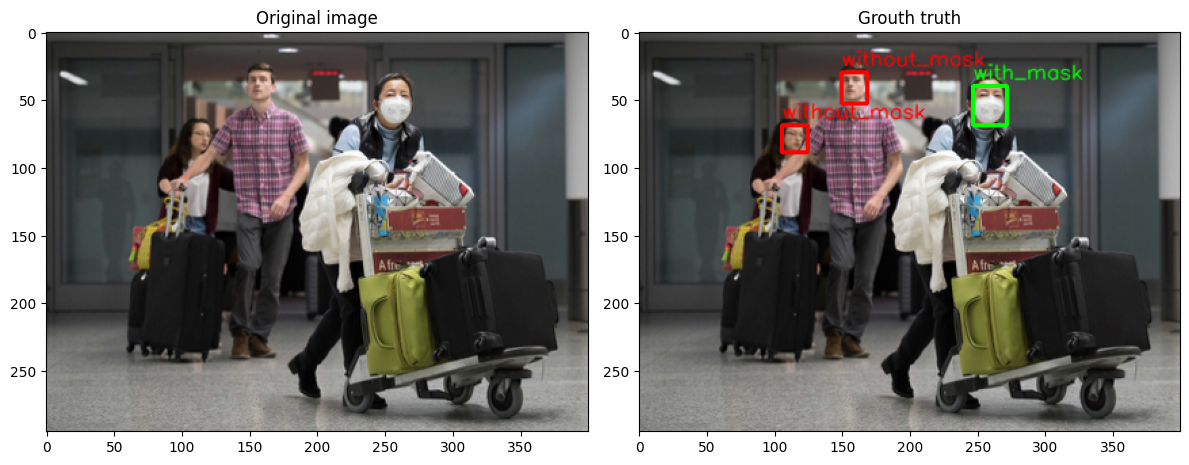

In [8]:
filename = 'maksssksksss129'
imagePath = f'datasets/images/test/{filename}.png'
labelPath = f'datasets/labels/test/{filename}.txt'
showImage(imagePath, labelPath=labelPath)

# Model

In [12]:
# !wandb disabled

In [9]:
root = os.getcwd()
datasetPath = os.path.join(root, DATASET_DIR)

# Create dataset.yaml
yamlText = f"""path: {datasetPath}
train: images/train 
val: images/val/ 
test: images/test/

names:
    0: without_mask
    1: with_mask
    2: mask_weared_incorrect"""

with open(f"data.yaml", 'w') as file:
    file.write(yamlText)

In [10]:
from ultralytics import YOLO

In [11]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model 
trainResults = model.train(data="data.yaml", epochs=30, imgsz=480)

Ultralytics 8.3.128  Python-3.13.2 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True,

train: Scanning C:\Users\ADMIN\Code\faceMaskDetection_YOLOv8\datasets\labels\train.cache... 597 images, 0 backgrounds, 0 corrupt: 100%|██████████| 597/597 [00:00<?, ?it/s]


val: Fast image access  (ping: 1.21.1 ms, read: 138.3109.4 MB/s, size: 469.7 KB)


val: Scanning C:\Users\ADMIN\Code\faceMaskDetection_YOLOv8\datasets\labels\val.cache... 128 images, 0 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 480 train, 480 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.28G      1.881      2.851      1.373         28        480: 100%|██████████| 38/38 [00:16<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        128        515     0.0115      0.667      0.276      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.56G      1.389      1.473      1.064         34        480: 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        128        515      0.834      0.322      0.406       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.56G      1.346      1.258      1.037         74        480: 100%|██████████| 38/38 [00:10<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        128        515      0.472      0.394      0.444       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.73G      1.282      1.127      1.025         23        480: 100%|██████████| 38/38 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        128        515      0.525      0.439       0.48      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.73G      1.286      1.044      1.023         51        480: 100%|██████████| 38/38 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        128        515      0.526       0.54      0.538      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.73G      1.247     0.9731      1.003         60        480: 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        128        515      0.669      0.553      0.609      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.87G      1.221     0.9426      1.005         47        480: 100%|██████████| 38/38 [00:10<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        128        515       0.63      0.495      0.559      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.87G      1.227     0.9048     0.9809         36        480: 100%|██████████| 38/38 [00:09<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        128        515      0.696      0.576      0.652       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.87G      1.165     0.8265     0.9745         34        480: 100%|██████████| 38/38 [00:10<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        128        515      0.778      0.696      0.727      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.87G      1.187     0.8403      0.977         37        480: 100%|██████████| 38/38 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        128        515      0.637      0.634      0.656      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.02G      1.141     0.7976     0.9665         25        480: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        128        515      0.779      0.593      0.663      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.36G      1.107     0.7594     0.9652         33        480: 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        128        515      0.727      0.669      0.711      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.55G      1.126     0.7837      0.968         66        480: 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        128        515      0.774      0.647      0.707      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.69G      1.116      0.753     0.9579         42        480: 100%|██████████| 38/38 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        128        515      0.827      0.631      0.717      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.84G      1.116     0.7465     0.9605         18        480: 100%|██████████| 38/38 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        128        515       0.68      0.727      0.719      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.84G      1.111      0.734     0.9561         44        480: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        128        515      0.749      0.638      0.721      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         2G      1.117     0.7132     0.9508         77        480: 100%|██████████| 38/38 [00:10<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        128        515      0.883      0.681      0.763       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         2G      1.087     0.6922     0.9562         25        480: 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        128        515      0.914       0.68      0.793      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.16G      1.058     0.6722     0.9457         25        480: 100%|██████████| 38/38 [00:10<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        128        515      0.912      0.684      0.784      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.38G      1.051     0.6468     0.9397         55        480: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        128        515      0.824      0.761      0.783      0.514


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.69G      1.062     0.6926     0.9406          7        480: 100%|██████████| 38/38 [00:07<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        128        515      0.851      0.699      0.786      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       1.7G      1.037     0.6587     0.9396         11        480: 100%|██████████| 38/38 [00:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        128        515      0.817      0.728      0.778      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.84G      1.033     0.6325     0.9281         15        480: 100%|██████████| 38/38 [00:06<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        128        515      0.793       0.74       0.76      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.84G      1.017     0.6192     0.9294         19        480: 100%|██████████| 38/38 [00:06<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        128        515      0.862       0.68      0.758      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.84G      1.005     0.6103     0.9235         22        480: 100%|██████████| 38/38 [00:06<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        128        515      0.884      0.702       0.79       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.84G      0.982     0.5841     0.9151         22        480: 100%|██████████| 38/38 [00:06<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        128        515      0.812      0.741      0.779      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.84G     0.9922     0.5864     0.9135         28        480: 100%|██████████| 38/38 [00:06<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        128        515      0.809      0.702      0.785       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.84G      0.967     0.5713      0.919         24        480: 100%|██████████| 38/38 [00:06<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        128        515      0.822      0.744      0.775      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.84G     0.9666     0.5558     0.9138         15        480: 100%|██████████| 38/38 [00:06<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        128        515      0.814      0.704      0.776      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.84G      0.959     0.5485     0.9079         35        480: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all        128        515      0.806      0.712      0.776      0.548



30 epochs completed in 0.109 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.128  Python-3.13.2 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]


                   all        128        515      0.884      0.702      0.789      0.549
          without_mask         33         54        0.9      0.665      0.799      0.525
             with_mask        118        449      0.948       0.94      0.972      0.696
 mask_weared_incorrect         11         12      0.805        0.5      0.596      0.425
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs\detect\train2


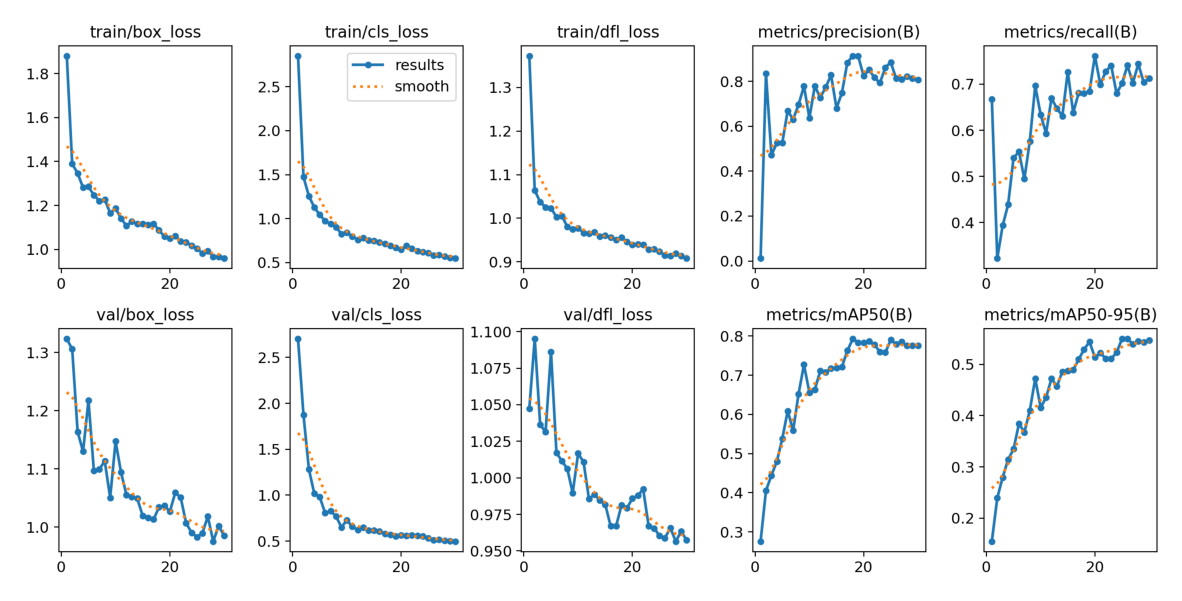

In [12]:
resultFig = cv2.imread(f'{str(trainResults.save_dir)}/results.png')
resultFig = cv2.cvtColor(resultFig, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(resultFig)
plt.show()

In [13]:
# Load a model
model = YOLO(f'{str(trainResults.save_dir)}/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val(data="data.yaml")  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.128  Python-3.13.2 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.1 ms, read: 854.3264.2 MB/s, size: 467.6 KB)


val: Scanning C:\Users\ADMIN\Code\faceMaskDetection_YOLOv8\datasets\labels\val.cache... 128 images, 0 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]


                   all        128        515      0.892        0.7      0.793      0.554
          without_mask         33         54      0.899      0.661      0.797      0.529
             with_mask        118        449      0.953       0.94      0.972      0.695
 mask_weared_incorrect         11         12      0.823        0.5      0.611      0.438
Speed: 0.5ms preprocess, 7.9ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs\detect\val


In [14]:
metrics = model.val(data="data.yaml", split='test')  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.128  Python-3.13.2 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
val: Fast image access  (ping: 0.20.1 ms, read: 48.58.5 MB/s, size: 583.2 KB)


val: Scanning C:\Users\ADMIN\Code\faceMaskDetection_YOLOv8\datasets\labels\test... 128 images, 0 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 282.93it/s]

val: New cache created: C:\Users\ADMIN\Code\faceMaskDetection_YOLOv8\datasets\labels\test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]


                   all        128        523      0.812      0.608      0.697      0.476
          without_mask         37         68      0.906      0.676      0.792        0.5
             with_mask        119        438      0.944      0.854       0.93      0.661
 mask_weared_incorrect         14         17      0.587      0.294      0.371      0.267
Speed: 0.7ms preprocess, 9.4ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs\detect\val2



image 1/1 c:\Users\ADMIN\Code\faceMaskDetection_YOLOv8\datasets\images\test\maksssksksss129.png: 384x480 2 without_masks, 1 with_mask, 101.6ms
Speed: 4.5ms preprocess, 101.6ms inference, 17.6ms postprocess per image at shape (1, 3, 384, 480)
Results saved to runs\detect\predict


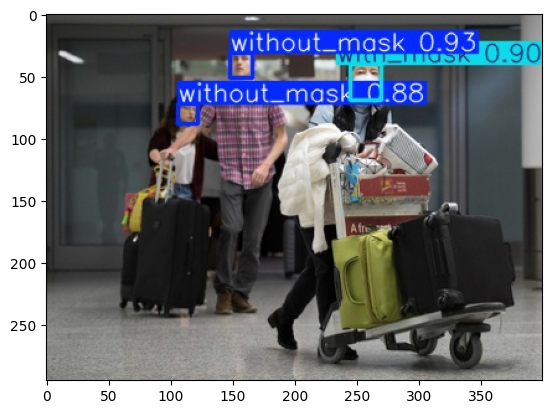

In [16]:
%matplotlib inline 

pred = model.predict(imagePath, save=True)

# Display saved prediction
predictedPath = f'{pred[0].save_dir}/{filename}.jpg'
predictedImg = cv2.imread(predictedPath)
predictedImg = cv2.cvtColor(predictedImg, cv2.COLOR_BGR2RGB)
plt.imshow(predictedImg)

In [19]:
def getPrediction(model, imagePath):
    """Return a prediction of parsing model for parsing image
        Args:
            model (torch.nn.Module): Model used for prediction
            imagePath (Path): Path to the image to be predicted 
        Return:
            prediction (list): Prediction for parsing image
    """
    results = model.predict(source=imagePath, conf=0.7, verbose=False)
    prediction = []
    for i in range(len(results[0].boxes.xywhn)):
        classIdx = results[0].boxes.cls[i].cpu().item()
        conf = round(results[0].boxes.conf[i].cpu().item(), 2)
        pred = list(results[0].boxes.xywhn[i].cpu().numpy())
        pred.append(classIdx)
        pred.append(conf)
        prediction.append(pred)
    return prediction

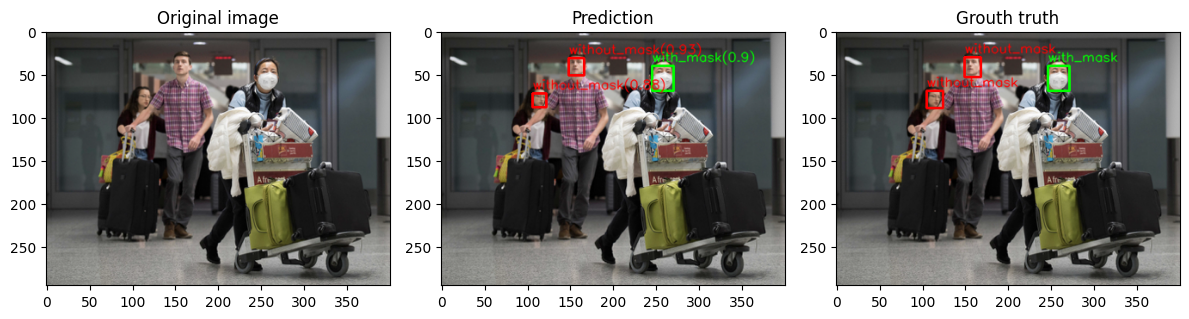

In [23]:
# Working with Results
prediction = getPrediction(model, imagePath)
showImage(imagePath, predictedBoxes=prediction, labelPath=labelPath)

# REAL-TIME CAMERA

In [25]:
%matplotlib inline

os.makedirs('camera', exist_ok=True) # Directory to store images
print("Press 'q' to capture image")
print("Press 'w' to predict on real-time")
print("Press 'space' to close camera")

# Open the video capture object for your webcam (index 0)
cap = cv2.VideoCapture(0)

isRealtimeDetection = False
while True:
  # Capture frame-by-frame
  ret, frame = cap.read()

  # Check if frame is captured successfully
  if not ret:
      print("Error! Unable to capture frame")
      break

  # Get keyboard input
  key = cv2.waitKey(1)
  
  # Press 'w' to detect in real time
  if key & 0xFF == ord('w'):
      isRealtimeDetection = not isRealtimeDetection
  
  if isRealtimeDetection:
      imgPath = 'camera/realtime.png'
      cv2.imwrite(imgPath, frame)
      prediction = getPrediction(model, imgPath)
      predictedImg = drawBoxes(frame, bndboxes=prediction, withConfScore=True, isRgb=False)
      frame = predictedImg
    
  # Press 'q' to capture image and exit
  if key & 0xFF == ord('q'):
      # Save the frame as an image
      imgPath = 'camera/captured_image.png'
      cv2.imwrite(imgPath, frame)
      print("Image captured!")
      prediction = getPrediction(model, imgPath)
      showImage(imgPath, predictedBoxes=prediction)
      break

  # Press 'space' to exit without capturing
  if key & 0xFF == ord(' '):
      break
  
  # Display the resulting frame
  cv2.imshow('Camera', frame)

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()


Press 'q' to capture image
Press 'w' to predict on real-time
Press 'space' to close camera
